<a href="https://colab.research.google.com/github/abasilio91/studies/blob/main/redes_neurais/RNN_com_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso de Pytorch da Camila "Peixe Babel" Laranjeira da Alura

[link da trilha](https://unibb.alura.com.br/formacao-deep-learning-pytorch)

# Curso 1 - Introdução às redes neurais

dados criados artificialmente [esse link](https://drawdata.xyz/) e armazenados dentro do meu drive.

In [1]:
# carrega dados

import pandas as pd

dados_classificacao_AB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/dados_classificacao_AB.csv')
dados_classificacao_AB

,x,y,z
0,159.829170,451.207218,a
1,213.110763,442.239943,a
2,128.881328,441.586327,a
3,172.679607,406.255250,a
4,219.658389,424.231318,a
...,...,...,...
693,311.745067,278.297268,b
694,320.416814,206.681836,b
695,322.487024,278.453773,b
696,347.483922,265.770815,b


<Axes: xlabel='x', ylabel='y'>

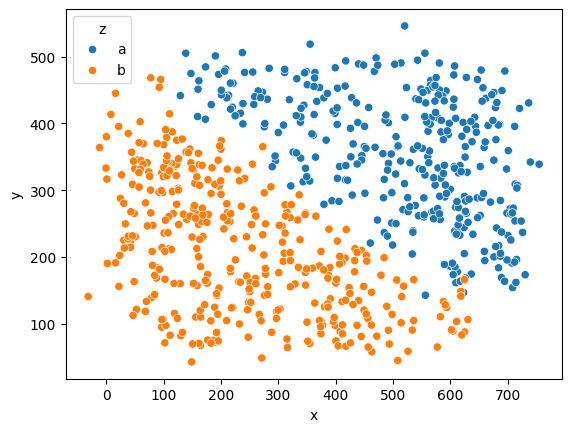

In [9]:
# visualização dos dados

import seaborn as sns

sns.scatterplot(data=dados_classificacao_AB, x='x', y='y', hue='z')

In [15]:
# Cria uma coluna de valores 0 ou 1 baseados no valores das classes de Z

dados_classificacao_AB['z_classe'] = dados_classificacao_AB.z.apply(lambda x: 0 if x == 'a' else 1)
dados_classificacao_AB

,x,y,z,z_bool,z_classe
0,159.829170,451.207218,a,False,0
1,213.110763,442.239943,a,False,0
2,128.881328,441.586327,a,False,0
3,172.679607,406.255250,a,False,0
4,219.658389,424.231318,a,False,0
...,...,...,...,...,...
693,311.745067,278.297268,b,True,1
694,320.416814,206.681836,b,True,1
695,322.487024,278.453773,b,True,1
696,347.483922,265.770815,b,True,1


In [16]:
# Convertendo o dataframe em tensores

import torch

x_tensor = torch.tensor(dados_classificacao_AB[['x', 'y']].values)
y_tensor = torch.tensor(dados_classificacao_AB['z_classe'].values)

print(x_tensor)
print('-------------------------')
print(y_tensor)

tensor([[159.8292, 451.2072],
        [213.1108, 442.2399],
        [128.8813, 441.5863],
        ...,
        [322.4870, 278.4538],
        [347.4839, 265.7708],
        [346.6580, 263.5262]], dtype=torch.float64)
-------------------------
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0